In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import os

In [2]:
os.chdir('/kaggle/input/novel-corona-virus-2019-dataset/')
os.listdir()

['time_series_covid_19_confirmed.csv',
 'time_series_covid_19_recovered.csv',
 'COVID19_open_line_list.csv',
 'time_series_covid_19_deaths.csv',
 'covid_19_data.csv',
 'COVID19_line_list_data.csv']

In [3]:
covid_data = pd.read_csv("covid_19_data.csv")
covid_data.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [4]:
states = covid_data['Province/State'].unique()
countries = covid_data['Country/Region'].unique()

<p>Now the data is such that each country is divided into province/state. Also, the data in confirmed/deaths/recovered columns are all cummulative i.e. each column is the number of cases till that particular day from the beginning. Therefore, the data in the colunmns of 22nd March 2020 is the total number of confirmed/deaths/recovered in a particular state of a particular country.
    That's why, <b>value_counts()</b> numbers are so large, as shown in the next block of code<p> 

In [5]:
covid_data['Country/Region'].value_counts()

Mainland China         1889
US                     1617
Australia               323
Canada                  254
France                  127
                       ... 
Grenada                   1
Republic of Ireland       1
('St. Martin',)           1
St. Martin                1
Timor-Leste               1
Name: Country/Region, Length: 200, dtype: int64

In [6]:
# to get the last updated date of the dataset

covid_data['Last Update'].unique()

array(['1/22/2020 17:00', '1/23/20 17:00', '1/24/20 17:00', ...,
       '2020-03-22T23:13:21', '2020-03-22T11:13:23',
       '2020-03-22T08:13:35'], dtype=object)

## Check for top 10 affected countries in 3 categories - confirmed cases, deaths and recovered cases

Now, let's start our investigation with country-wise cases. We begin by finding the countries with the **largest** number of cases in all 3 categories - confirmed, deaths and recovered. We then plot the top 10 countries in each category and try to find a inference.

In [7]:
confirm_dict = {}
deaths_dict = {}
recover_dict = {}
for country in countries:
    country_data = covid_data[covid_data['Country/Region'] == country]
    #cummulative, so we can simply take the latest date for final result
    max_date = country_data['ObservationDate'].max()
    sub = country_data[country_data['ObservationDate'] == max_date]
    confirm = sub['Confirmed'].sum()
    death = sub['Deaths'].sum()
    recover = sub['Recovered'].sum()
    
    confirm_dict[country] = confirm
    deaths_dict[country] = death
    recover_dict[country] = recover


In [8]:
confirm_dict_sorted = sorted(confirm_dict.items(), key = lambda kv:(kv[1], kv[0]), reverse = True)
deaths_dict_sorted = sorted(deaths_dict.items(), key = lambda kv:(kv[1], kv[0]), reverse = True)
recover_dict_sorted = sorted(recover_dict.items(), key = lambda kv:(kv[1], kv[0]), reverse = True)

In [9]:
top10_confirm = confirm_dict_sorted[:10]
top10_deaths = deaths_dict_sorted[:10]
top10_recover = recover_dict_sorted[:10]
top10_confirm = dict(top10_confirm)
top10_deaths = dict(top10_deaths)
top10_recover = dict(top10_recover)

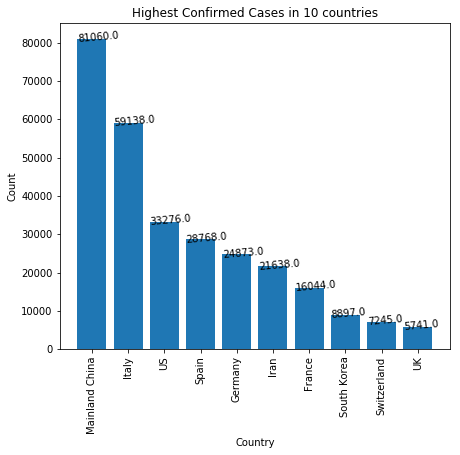

In [10]:
plt.figure(figsize = (7,6))
bars = plt.bar(top10_confirm.keys(), top10_confirm.values())
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Highest Confirmed Cases in 10 countries')
plt.xticks(list(top10_confirm.keys()), rotation = 90)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval, rotation = 5)
plt.show()

Here, we see China as the leader with the highest number of confirmed cases. That was to be expected as China was origin country for COVID-19,specifically Wuhan. Yet, what is surprising is the amount of European countries in the list. Countries like Italy, Spain and Germany are in the top 5 and there are 6 European countries in the top 10 list. <br>
This clearly shows how contagious the virus is, and how rapidly it has spread over the entire continent. <br>
Additionally, it also raises questions on healthcare infrastructure and government decisions in the European Union. <br>

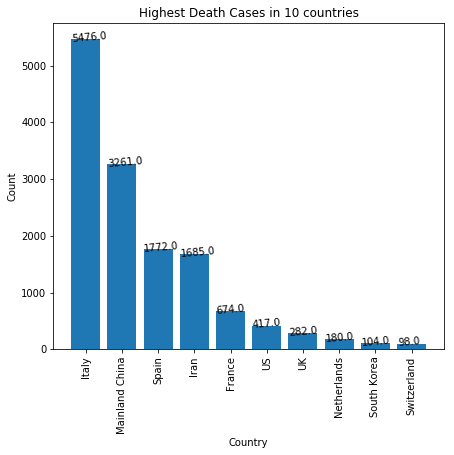

In [11]:
plt.figure(figsize = (7,6))
bars = plt.bar(top10_deaths.keys(), top10_deaths.values())
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Highest Death Cases in 10 countries')
plt.xticks(list(top10_deaths.keys()), rotation = 90)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval, rotation = 5)
plt.show()

Here, we see Italy being the country with highest amount of deaths, followed by China. Interestingly enough, there are again 6 European countries in the top 10 list for deaths. This time, Germany is not in the list, instead there is Netherlands. This probably means Germany has better medical facilities to tackle the pandemic. Netherland with a smaller cohort for **confirmed** cases and more number of deaths.

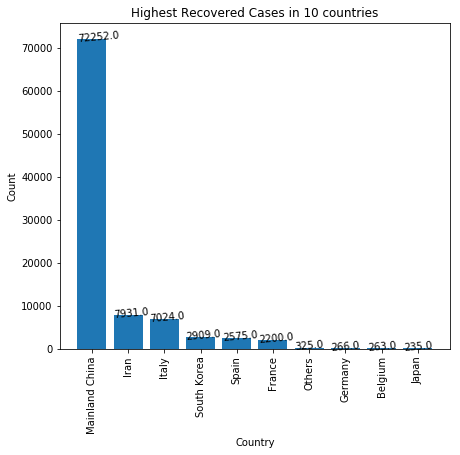

In [12]:
plt.figure(figsize = (7,6))
bars = plt.bar(top10_recover.keys(), top10_recover.values())
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Highest Recovered Cases in 10 countries')
plt.xticks(list(top10_recover.keys()), rotation = 90)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval, rotation = 5)
plt.show()

This was very interesting to me, as news articles on TV and newspaper mostly cover how fast the pandemic is spreading. People talk about deaths and new cases popping up everyday, yet we rarely see how countries are doing in terms of recovery from the virus. <br>
It's astonishing to see such a high recovery percentage in China. Be it the quarantine measures, country-wide lockdowns or unorthodox medical experiments, there is something going for China. They were the worst impacted, but numbers show that a majority of the population has also recovered. 

## Trend Curves for the top 5 countries with most number of confirmed cases 

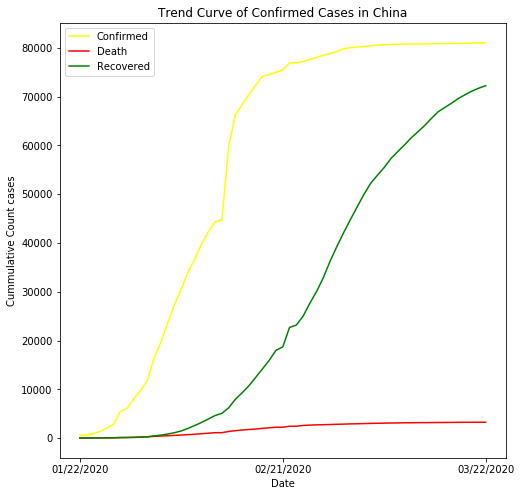

In [13]:
china_data = covid_data[covid_data['Country/Region'] == 'Mainland China']
date = []
c = []
d = []
r = []
for dat in china_data['ObservationDate'].unique():
    sub = china_data[china_data['ObservationDate'] == dat]
    confirm = sub['Confirmed'].sum()
    death = sub['Deaths'].sum()
    recover = sub['Recovered'].sum()
    date.append(dat)
    c.append(confirm)
    d.append(death)
    r.append(recover)
    
date = pd.Series(date)
c  =pd.Series(c)
d = pd.Series(d)
r = pd.Series(r)

t = [date.min(), date[len(date)//2], date.max()]
plt.figure(figsize=(8,8))
plt.plot(date, c, color = 'yellow')
plt.plot(date, d, color = 'red')
plt.plot(date, r, color = 'green')
plt.xticks(t, t)
plt.xlabel('Date')
plt.ylabel('Cummulative Count cases')
plt.title('Trend Curve of Confirmed Cases in China')
plt.legend(['Confirmed', 'Death', 'Recovered'])
plt.show()

In conjunction to the last graph, we can see how the rates of getting new confirmed cases have stagnated over the last month. The **yellow** curve from 22nd Jan 2020 to about 19th Feb 2020 shows a very steep increase in confirmed cases everyday. Yet, the rate drastically slows down over the next month. In parallel, recovery of patients also follows a fairly steep curve, showing how effective the preventive and quarantine measures were. This trend will seem to follow in the coming weeks.

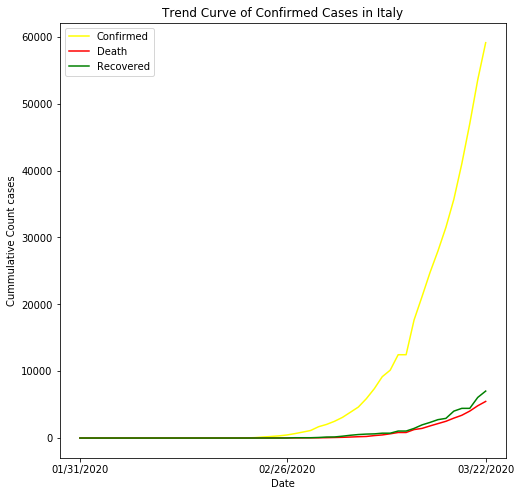

In [14]:
italy_data = covid_data[covid_data['Country/Region'] == 'Italy']
date = []
c = []
d = []
r = []
for dat in italy_data['ObservationDate'].unique():
    sub = italy_data[italy_data['ObservationDate'] == dat]
    confirm = sub['Confirmed'].sum()
    death = sub['Deaths'].sum()
    recover = sub['Recovered'].sum()
    date.append(dat)
    c.append(confirm)
    d.append(death)
    r.append(recover)

date = pd.Series(date)
c  =pd.Series(c)
d = pd.Series(d)
r = pd.Series(r)

t = [date.min(), date[len(date)//2], date.max()]
plt.figure(figsize=(8,8))
plt.plot(date, c, color = 'yellow')
plt.plot(date, d, color = 'red')
plt.plot(date, r, color = 'green')
plt.xticks(t, t)
plt.xlabel('Date')
plt.ylabel('Cummulative Count cases')
plt.title('Trend Curve of Confirmed Cases in Italy')
plt.legend(['Confirmed', 'Death', 'Recovered'])
plt.show()

Italy on the other hand is the worst hit of all European nations, infact the worst hit after China. There is an exponential growth of confirmed cases starting from around 27th to 28th Feb 2020. Over the past few days, the death numbers are also starting to form an exponential curve. As things look now, the situation will worse if immediate action in not taken.

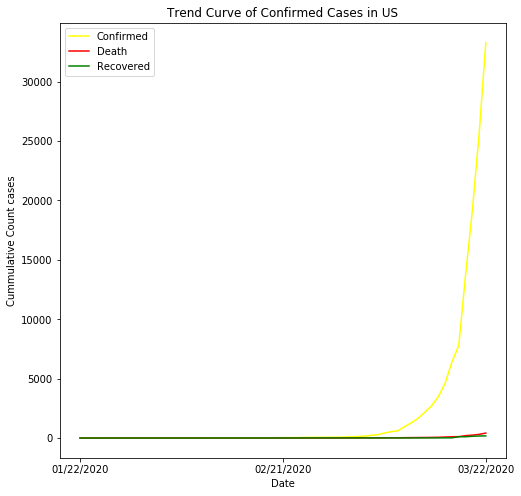

In [15]:
us_data = covid_data[covid_data['Country/Region'] == 'US']
date = []
c = []
d = []
r = []
for dat in us_data['ObservationDate'].unique():
    sub = us_data[us_data['ObservationDate'] == dat]
    confirm = sub['Confirmed'].sum()
    death = sub['Deaths'].sum()
    recover = sub['Recovered'].sum()
    date.append(dat)
    c.append(confirm)
    d.append(death)
    r.append(recover)

date = pd.Series(date)
c  =pd.Series(c)
d = pd.Series(d)
r = pd.Series(r)

t = [date.min(), date[len(date)//2], date.max()]
plt.figure(figsize=(8,8))
plt.plot(date, c, color = 'yellow')
plt.plot(date, d, color = 'red')
plt.plot(date, r, color = 'green')
plt.xticks(t, t)
plt.xlabel('Date')
plt.ylabel('Cummulative Count cases')
plt.title('Trend Curve of Confirmed Cases in US')
plt.legend(['Confirmed', 'Death', 'Recovered'])
plt.show()

Trend similar to Italy follows for the rest of the countries shown in the next few plot. In the US specifically, one can attribute this growth of cases to a large immigrant population, frequent international travel by many people, carefree nature of citizens even after repeated instructions by government of self-containment. People still go to pubs, beaches and other crowded places and inevidently spread the virulent virus.

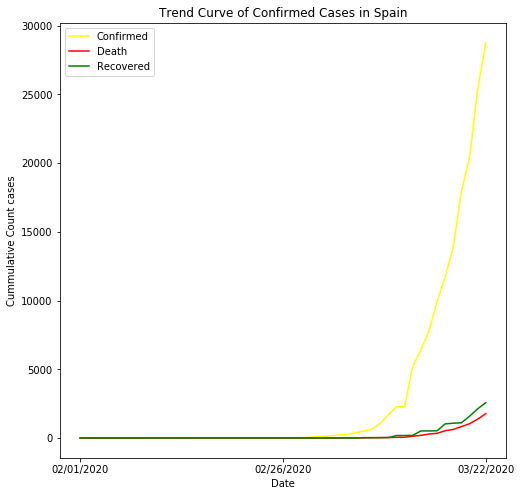

In [16]:
spain_data = covid_data[covid_data['Country/Region'] == 'Spain']
date = []
c = []
d = []
r = []
for dat in spain_data['ObservationDate'].unique():
    sub = spain_data[spain_data['ObservationDate'] == dat]
    confirm = sub['Confirmed'].sum()
    death = sub['Deaths'].sum()
    recover = sub['Recovered'].sum()
    date.append(dat)
    c.append(confirm)
    d.append(death)
    r.append(recover)

date = pd.Series(date)
c  =pd.Series(c)
d = pd.Series(d)
r = pd.Series(r)

t = [date.min(), date[len(date)//2], date.max()]
plt.figure(figsize=(8,8))
plt.plot(date, c, color = 'yellow')
plt.plot(date, d, color = 'red')
plt.plot(date, r, color = 'green')
plt.xticks(t, t)
plt.xlabel('Date')
plt.ylabel('Cummulative Count cases')
plt.title('Trend Curve of Confirmed Cases in Spain')
plt.legend(['Confirmed', 'Death', 'Recovered'])
plt.show()

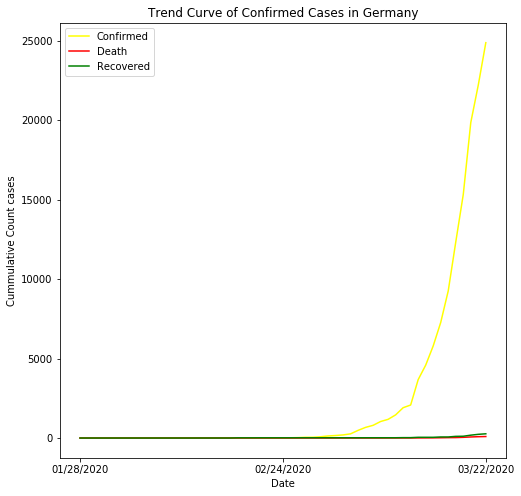

In [17]:
germany_data = covid_data[covid_data['Country/Region'] == 'Germany']
date = []
c = []
d = []
r = []
for dat in germany_data['ObservationDate'].unique():
    sub = germany_data[germany_data['ObservationDate'] == dat]
    confirm = sub['Confirmed'].sum()
    death = sub['Deaths'].sum()
    recover = sub['Recovered'].sum()
    date.append(dat)
    c.append(confirm)
    d.append(death)
    r.append(recover)

date = pd.Series(date)
c  =pd.Series(c)
d = pd.Series(d)
r = pd.Series(r)

t = [date.min(), date[len(date)//2], date.max()]
plt.figure(figsize=(8,8))
plt.plot(date, c, color = 'yellow')
plt.plot(date, d, color = 'red')
plt.plot(date, r, color = 'green')
plt.xticks(t, t)
plt.xlabel('Date')
plt.ylabel('Cummulative Count cases')
plt.title('Trend Curve of Confirmed Cases in Germany')
plt.legend(['Confirmed', 'Death', 'Recovered'])
plt.show()

From the above 5 graphs, it is very clear something is different with the Chinese graph. While the other curves tend to follow a exponential curve, the Chinese one is the other way round. It stabalizes as each day passes.

## Now let's conclude a few global statistics

At a global level, as of 22nd March 2020, **336018** people have been infected. The following pie chart shows the necessary distribution.

In [18]:
total_confirmed = sum(list(confirm_dict.values()))
total_deaths = sum(list(deaths_dict.values()))
total_recovered = sum(list(recover_dict.values()))

total_still_affected = total_confirmed -(total_deaths+total_recovered)
print("World Population affectedas of 22nd March 2020: ", total_confirmed)

World Population affectedas of 22nd March 2020:  336018.0


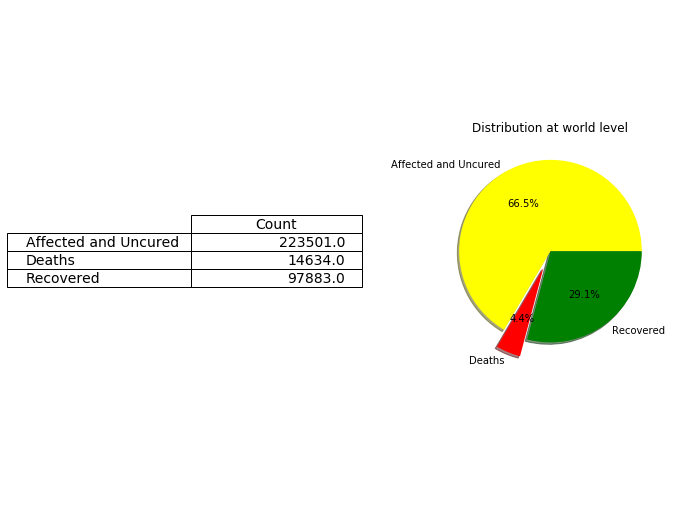

In [19]:
groups = ['Affected and Uncured', 'Deaths', 'Recovered']
sizes = [total_still_affected, total_deaths, total_recovered]
colours = ['Yellow', 'Red', 'Green']
explode = (0, 0.2, 0)
col_labels = ['Count']
row_labels = ['Affected and Uncured', 'Deaths', 'Recovered']
table_values = [[total_still_affected],[total_deaths], [total_recovered]]


fig, axs = plt.subplots(1,2, figsize = (9,9))
axs[0].axis('tight')
axs[0].axis('off')
the_table = axs[0].table(cellText=table_values,colWidths = [0.5], colLabels=col_labels, rowLabels = row_labels, loc='center')
the_table.set_fontsize(14)
the_table.scale(1.5, 1.5)
axs[1].pie(sizes, labels = groups, explode = explode, colors=colours, shadow=True, autopct='%1.1f%%')
plt.title('Distribution at world level')
plt.show()

In addition, we can also analyze the global proportion of confirmed, recovered and death cases. From the above bar graphs, it can be seen that China and Italy has the most number of confirmed cases; forming a significant part of the global infected cohort.

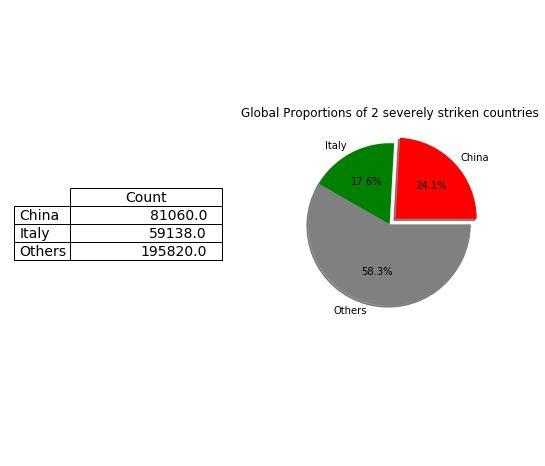

In [20]:
china_c_number = confirm_dict['Mainland China']
italy_c_number = confirm_dict['Italy']
others_c = 0
for key in confirm_dict:
    if key != 'Mainland China' and key != 'Italy':
        others_c+=confirm_dict[key]
        
groups = ['China', 'Italy', 'Others']
sizes = [china_c_number, italy_c_number, others_c]
colours = ['Red', 'Green', 'Grey']
explode = (0.1, 0, 0)
col_labels = ['Count']
row_labels = ['China', 'Italy', 'Others']
table_values = [[china_c_number], [italy_c_number], [others_c]]


fig, axs = plt.subplots(1,2, figsize = (8,8))
axs[0].axis('tight')
axs[0].axis('off')
the_table = axs[0].table(cellText=table_values,colWidths = [0.5], colLabels=col_labels, rowLabels = row_labels, loc='center')
the_table.set_fontsize(14)
the_table.scale(1.5, 1.5)
axs[1].pie(sizes, labels = groups, explode = explode, colors=colours, shadow=True, autopct='%1.1f%%')
plt.title('Global Proportions of 2 severely striken countries')
plt.show()

It is quite evident that almost half of the infected people reside in either China or Italy. To be precise, <b>41.7%</b> of the global infected cohort resides in these 2 countries.

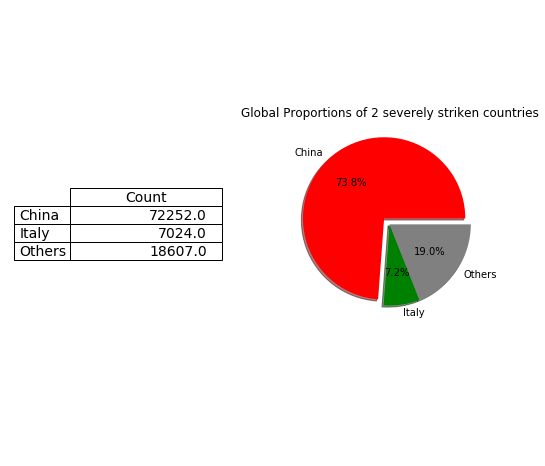

In [21]:
china_r_number = recover_dict['Mainland China']
italy_r_number = recover_dict['Italy']
others_r = 0
for key in recover_dict:
    if key != 'Mainland China' and key != 'Italy':
        others_r+=recover_dict[key]
        
groups = ['China', 'Italy', 'Others']
sizes = [china_r_number, italy_r_number, others_r]
colours = ['Red', 'Green', 'Grey']
explode = (0.1, 0, 0)
col_labels = ['Count']
row_labels = ['China', 'Italy', 'Others']
table_values = [[china_r_number], [italy_r_number], [others_r]]


fig, axs = plt.subplots(1,2, figsize = (8,8))
axs[0].axis('tight')
axs[0].axis('off')
the_table = axs[0].table(cellText=table_values,colWidths = [0.5], colLabels=col_labels, rowLabels = row_labels, loc='center')
the_table.set_fontsize(14)
the_table.scale(1.5, 1.5)
axs[1].pie(sizes, labels = groups, explode = explode, colors=colours, shadow=True, autopct='%1.1f%%')
plt.title('Global Proportions of 2 severely striken countries')
plt.show()

In [22]:
italian_death_perc = (deaths_dict['Italy']/total_deaths)*100
print('Death Percentage in Italy: ', italian_death_perc)

china_death_perc = (deaths_dict['Mainland China']/total_deaths)*100
print('Death Percentage in China: ', china_death_perc)

print(total_deaths)

Death Percentage in Italy:  37.41970753040864
Death Percentage in China:  22.283722837228375
14634.0


We can see that an outstanding amount of patients in China have already recovered. While China has a recovery rate of <b>89.13%</b>, Italy suffers in this area producing only about <b>11.87%</b> of recovery cases. This shows that China, even though was struck first by the now pandemic has taken incredible preventive steps to get the virus under control. 

On the other hand, Italy's response to the coronavirus was slow. Due to lack of adequate emergency medical units and slow govevrnment plans, Italy is now shifting to become the <b>World Epicenter</b> of COVID-19.

This is very clear from the death percentages in the next graph. Even though China death rates were high in the beginning, they have stablized. China got the disease first, and by common logic should have suffered the highest number of casualities. Yet, Italy has exceeded the death count in far fewer days, and from the above trend curve we also see that Chinese cases have stagnated and very few have got infected and died over the recent few days.

<b>Some Possible Explainations:</b><br>
<b>It is important to note that China is a larger country. Therefore, even though it hosts the largest population in the world, the population density is not so uniformly packed. In that respect, India has a higher population density than China, and is at a greater risk.</b><br>
<b>Also, it can also be possible that Italy has a larger population of old people. This can also be attributed to the ever increasing mortality rate.</b>

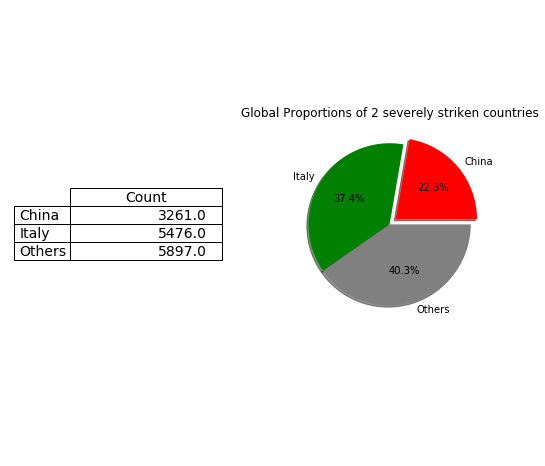

In [23]:
china_d_number = deaths_dict['Mainland China']
italy_d_number = deaths_dict['Italy']
others_d = 0
for key in deaths_dict:
    if key != 'Mainland China' and key != 'Italy':
        others_d+=deaths_dict[key]
        
groups = ['China', 'Italy', 'Others']
sizes = [china_d_number, italy_d_number, others_d]
colours = ['Red', 'Green', 'Grey']
explode = (0.1, 0, 0)
col_labels = ['Count']
row_labels = ['China', 'Italy', 'Others']
table_values = [[china_d_number], [italy_d_number], [others_d]]


fig, axs = plt.subplots(1,2, figsize = (8,8))
axs[0].axis('tight')
axs[0].axis('off')
the_table = axs[0].table(cellText=table_values,colWidths = [0.5], colLabels=col_labels, rowLabels = row_labels, loc='center')
the_table.set_fontsize(14)
the_table.scale(1.5, 1.5)
axs[1].pie(sizes, labels = groups, explode = explode, colors=colours, shadow=True, autopct='%1.1f%%')
plt.title('Global Proportions of 2 severely striken countries')
plt.show()

### In the upcoming versions of the notebook, I will be implementing prediction models to forecast the trend. Also, as part of the research challenge CORD-19, I will be updating this document with Task 2 specific material and analysis. Also, there is a lot of formatting to be done.<br>
### I have already made a separate notebook which preprocesses the text data in CORD-19 dataset for word embeddings and I'm working on getting the notebook out ASAP.

### Thank You for going through my notebook. I hope it gave you some ideas to get started. Comments and suggestions are welcome. Please drop an Upvote if you liked. Helps me keep motivated :)